In [43]:
#DIDA Framework
#

In [44]:
# Pandas is the Python package for data frames
# Seaborn is for data visualization

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [45]:
# These predictors are exante or unnecessary: PID 

In [ ]:
# Part 1 Data Acquisition

# Read data from a CSV file into a data frame
df = pd.read_csv("AmesHousing.csv", index_col=0)

# Display the first ten rows of the data frame to examine if it is an individual-level data set
print(df.head(10))

# Display the variable list
print(df.columns.values)

# Display the number of rows and the number of columns in the data set to confirm the portrait shape
# The first element of the output is the number of rows and the second is the number of columns 
df.shape

# Let's drop columns that are unnamed or have no meaning, and also drop PID
# Identify unnamed columns and PID, which has no meaning
unnamed_cols = [col for col in df.columns if 'unnamed' in col.lower() or 'no meaning' in col.lower()]
columns_to_drop = unnamed_cols + ['PID']

# Drop identified columns
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

print(f"Dropped {len(unnamed_cols)} unnamed columns and PID")
print(f"DataFrame shape after dropping columns: {df_cleaned.shape}")

df_cleaned.shape

             PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
Order                                                                          
1      526301100           20        RL         141.0     31770   Pave   NaN   
2      526350040           20        RH          80.0     11622   Pave   NaN   
3      526351010           20        RL          81.0     14267   Pave   NaN   
4      526353030           20        RL          93.0     11160   Pave   NaN   
5      527105010           60        RL          74.0     13830   Pave   NaN   
6      527105030           60        RL          78.0      9978   Pave   NaN   
7      527127150          120        RL          41.0      4920   Pave   NaN   
8      527145080          120        RL          43.0      5005   Pave   NaN   
9      527146030          120        RL          39.0      5389   Pave   NaN   
10     527162130           60        RL          60.0      7500   Pave   NaN   

      Lot Shape Land Contour Utilities 

(2930, 80)

Plotting scatterplot: Lot Area vs SalePrice


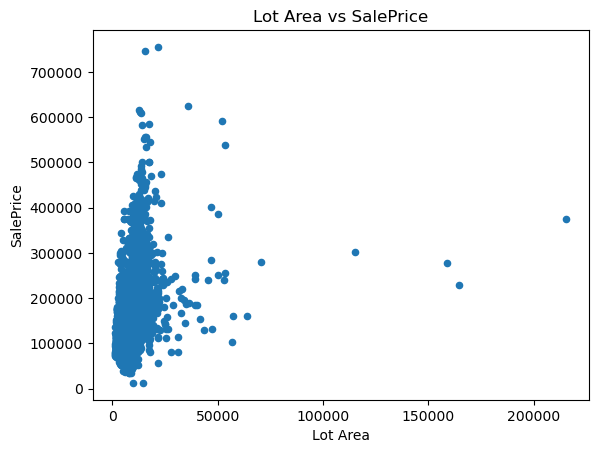

Plotting scatterplot: Overall Qual vs SalePrice


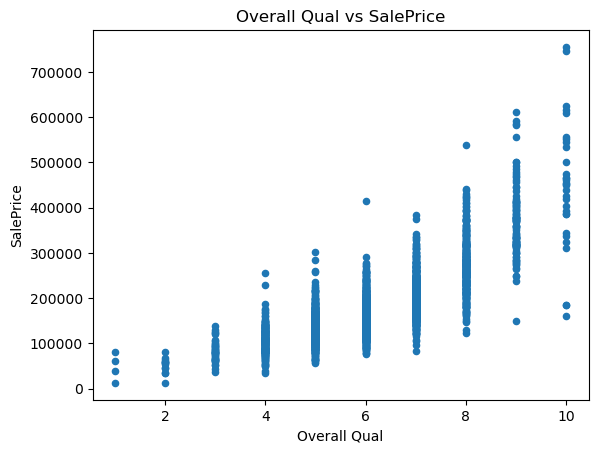

Plotting scatterplot: Year Built vs SalePrice


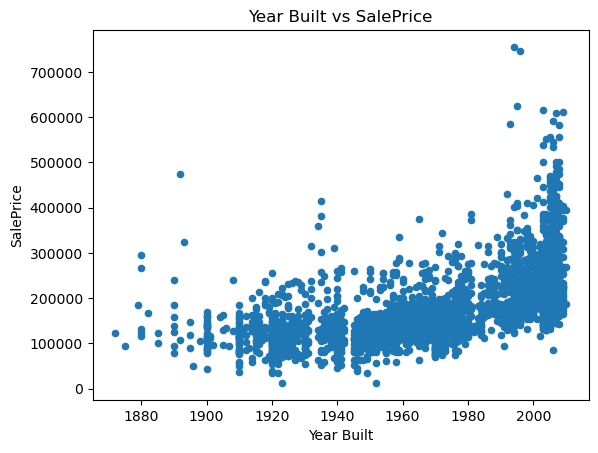

Plotting scatterplot: Total Bsmt SF vs SalePrice


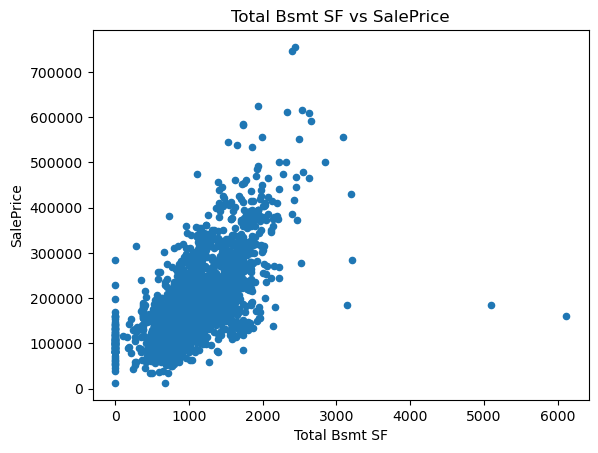

Plotting scatterplot: Gr Liv Area vs SalePrice


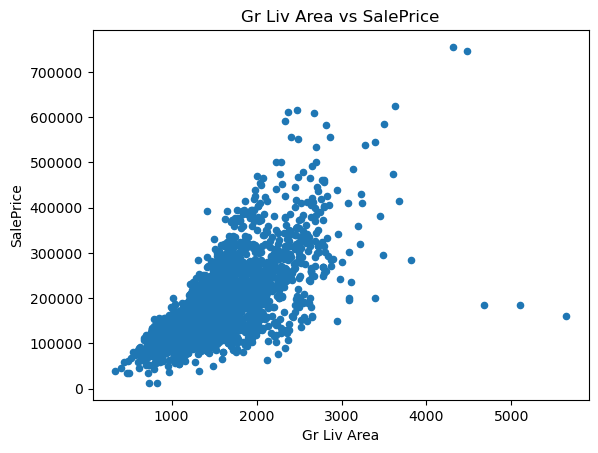

Plotting scatterplot: Full Bath vs SalePrice


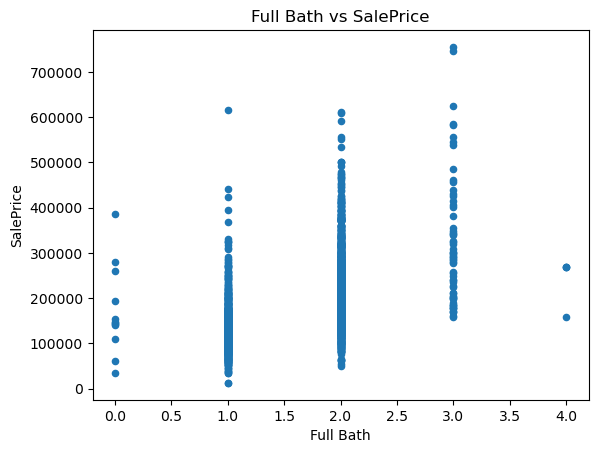

Plotting scatterplot: Garage Cars vs SalePrice


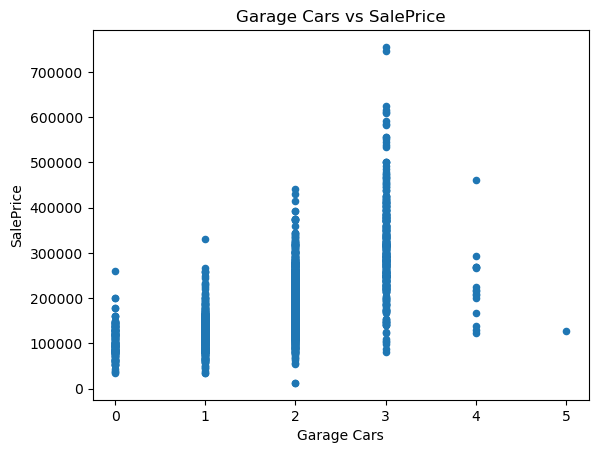

Plotting scatterplot: Mas Vnr Area vs SalePrice


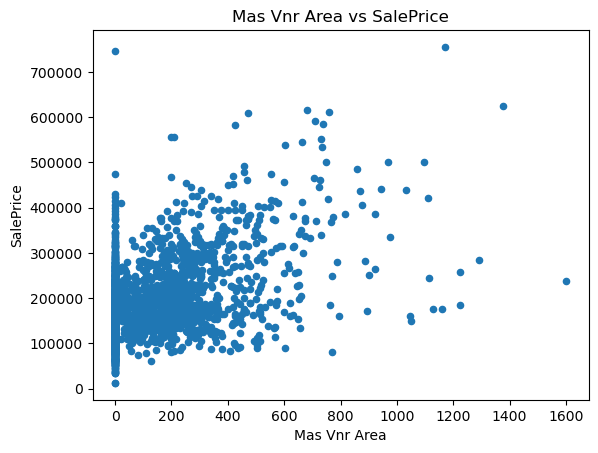

Plotting scatterplot: 1st Flr SF vs SalePrice


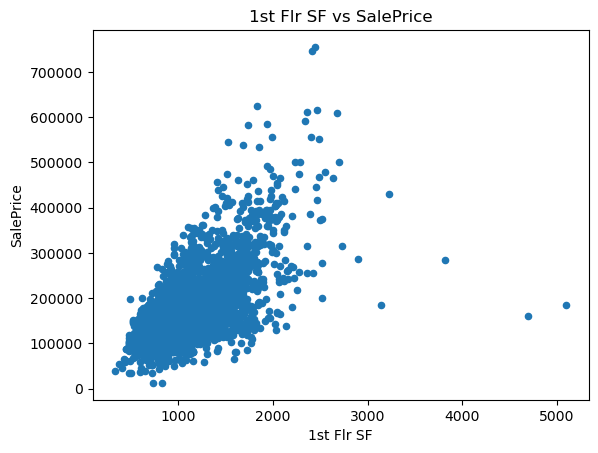

Plotting boxplot: Neighborhood vs SalePrice


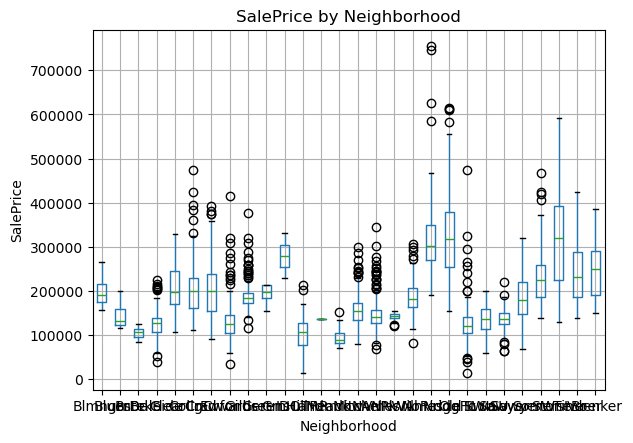

Plotting boxplot: House Style vs SalePrice


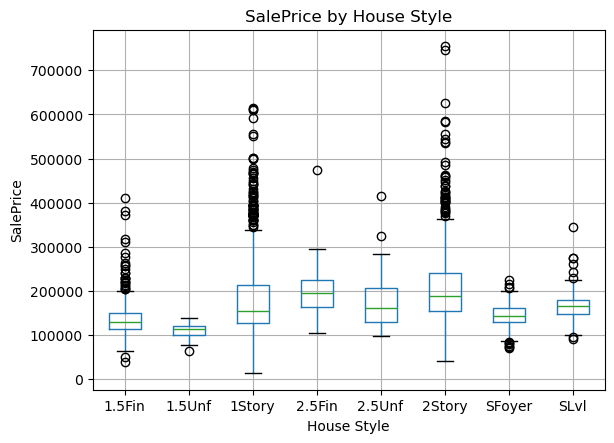

Plotting boxplot: Bldg Type vs SalePrice


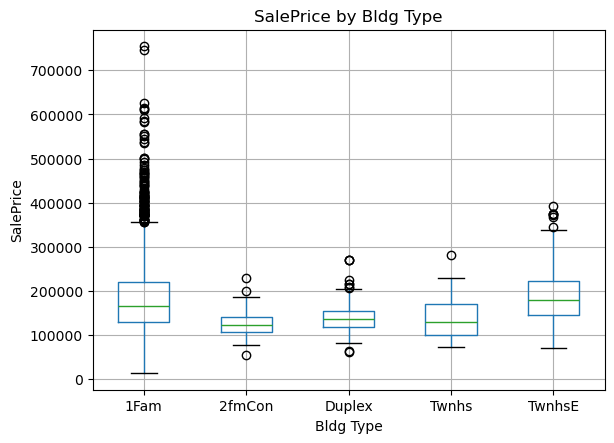

Plotting boxplot: Kitchen Qual vs SalePrice


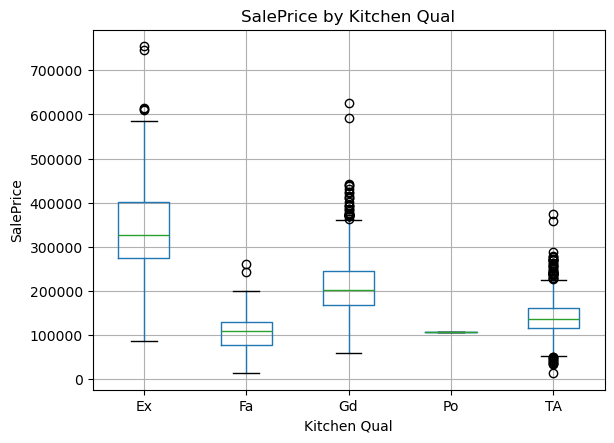

Plotting boxplot: Exter Qual vs SalePrice


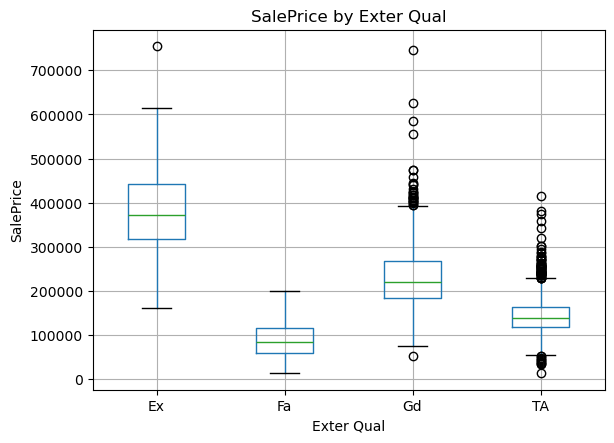

Plotting boxplot: Foundation vs SalePrice


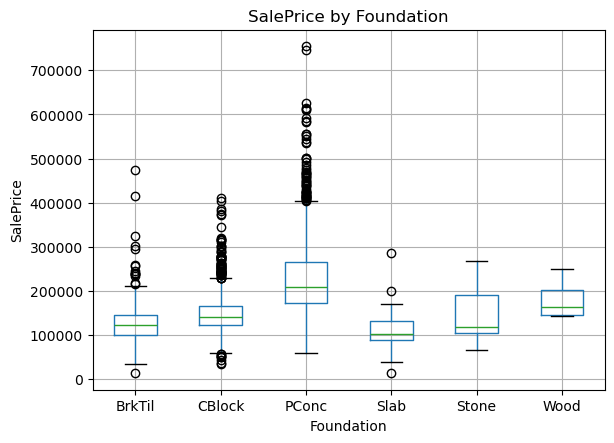

In [47]:
# Part 2: Data Exploration with line graphs and box plots

# List of all our selected predictors for our models
predictors = [
    'Lot Area', 'Overall Qual', 'Year Built', 'Total Bsmt SF', 'Gr Liv Area',
    'Neighborhood', 'House Style', 'Full Bath', 'Bldg Type', 'Kitchen Qual',
    'Garage Cars', 'Exter Qual', 'Mas Vnr Area', '1st Flr SF', 'Foundation'
]

# Dependent variable
y_var = 'SalePrice'

# Separate numeric vs categorical predictors
num_vars = [
    'Lot Area', 'Overall Qual', 'Year Built', 'Total Bsmt SF', 'Gr Liv Area',
    'Full Bath', 'Garage Cars', 'Mas Vnr Area', '1st Flr SF'
]
cat_vars = [
    'Neighborhood', 'House Style', 'Bldg Type', 'Kitchen Qual',
    'Exter Qual', 'Foundation'
]

# Numerical Variables: Scatterplots ---
for x_var in num_vars:
    print(f"Plotting scatterplot: {x_var} vs {y_var}")
    df.plot.scatter(x=x_var, y=y_var, legend=False)
    plt.title(f'{x_var} vs {y_var}')
    plt.show()

# Categorical Variables: Side-by-Side Boxplots ---
for x_var in cat_vars:
    print(f"Plotting boxplot: {x_var} vs {y_var}")
    df4ssb = df_cleaned  # placeholder for consistency with your template
    ax = df4ssb.boxplot(column=y_var, by=x_var)
    ax.set_ylabel(y_var)
    plt.title(f'{y_var} by {x_var}')
    plt.suptitle("")  # removes the default automatic title
    plt.show()


In [48]:
# Based on the scatter plots and bar plots, I predict that.

               Lot Area  Overall Qual  Year Built  Total Bsmt SF  Gr Liv Area  \
Lot Area       1.000000      0.097188    0.023258       0.253589     0.285599   
Overall Qual   0.097188      1.000000    0.597027       0.547294     0.570556   
Year Built     0.023258      0.597027    1.000000       0.407526     0.241726   
Total Bsmt SF  0.253589      0.547294    0.407526       1.000000     0.444675   
Gr Liv Area    0.285599      0.570556    0.241726       0.444675     1.000000   
Full Bath      0.127433      0.522263    0.469406       0.324973     0.630321   
Garage Cars    0.179512      0.599545    0.537443       0.437608     0.488829   
Mas Vnr Area   0.126830      0.429418    0.313292       0.397040     0.403611   
1st Flr SF     0.332235      0.477837    0.310463       0.800720     0.562166   
SalePrice      0.266549      0.799262    0.558426       0.632280     0.706780   

               Full Bath  Garage Cars  Mas Vnr Area  1st Flr SF  SalePrice  
Lot Area        0.127433     0.

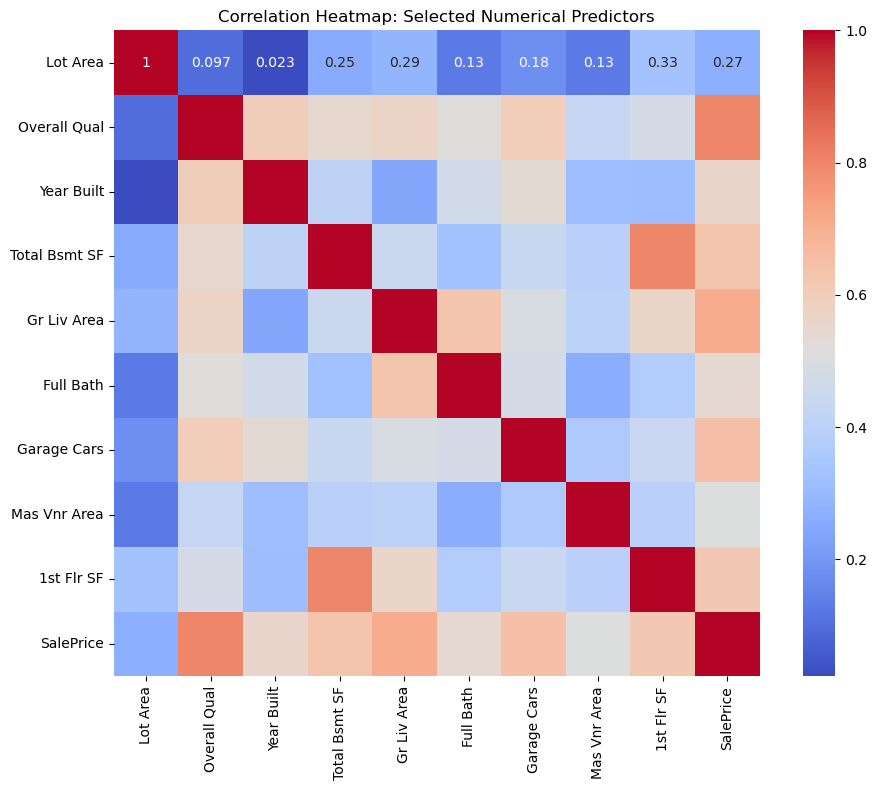

In [49]:
# Draw a heat map for our numerical predictors


# Define categorical and numerical variable lists separately

cvar_list = [
    'Neighborhood', 'House Style', 'Bldg Type', 'Kitchen Qual',
    'Exter Qual', 'Foundation'
]

nvar_list = [
    'Lot Area', 'Overall Qual', 'Year Built', 'Total Bsmt SF', 'Gr Liv Area',
    'Full Bath', 'Garage Cars', 'Mas Vnr Area', '1st Flr SF', 'SalePrice'
]

# Copy the dataframe
df4heatmaps = df_cleaned[nvar_list].copy()


# Compute the correlation matrix
corr = df4heatmaps.corr(numeric_only=True)

# Print correlation matrix
print(corr)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', xticklabels=corr.columns, yticklabels=corr.columns, square=True)
plt.title('Correlation Heatmap: Selected Numerical Predictors')
plt.tight_layout()
plt.show()


In [50]:
# Based on the heatmap, I predict that.

In [51]:
# Part 3 Missing Value Imputation

# Show the number of missing values before we start
print("Missing values before imputation:")
print(df_cleaned.isnull().sum().sort_values(ascending=False).head(10))
print("-" * 30)

# Drop rows where the dependent variable is missing
DV = 'SalePrice'
df_sample1 = df_cleaned.dropna(subset=[DV]).copy() # Use .copy() to avoid warnings

# --- 1. Impute "Meaningful NA" Categoricals ---
# These are columns where 'NA' is a category (e.g., "No Basement"), not missing data.
meaningful_na_columns = [
    'Alley', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 
    'BsmtFin Type 1', 'BsmtFin Type 2', 'FireplaceQu',
    'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
    'Pool QC', 'Fence', 'Misc Feature', 'Mas Vnr Type'
]

for col in meaningful_na_columns:
    if col in df_sample1.columns:
        df_sample1[col] = df_sample1[col].fillna('None')

# --- 2. Numerical Imputation ---
# We create df_sample2 by filling all numerical NAs
df_sample2 = df_sample1.copy()

# A. Smart Imputation (Context-Aware): Fill with 0
# If a house has no basement, its basement-related numericals should be 0, not a median.

# Basement-related numericals, if there is no Basement, then the other Basement columns get 0.
if 'Bsmt Qual' in df_sample2.columns:
    mask = (df_sample2['Bsmt Qual'] == 'None')
    bsmt_num_cols = ['Total Bsmt SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
    for col in bsmt_num_cols:
        if col in df_sample2.columns:
            df_sample2.loc[mask, col] = df_sample2.loc[mask, col].fillna(0)

# Garage-related numericals: If there is no Garage, then the other Garage columns get 0.
if 'Garage Type' in df_sample2.columns:
    mask = (df_sample2['Garage Type'] == 'None')
    garage_num_cols = ['Garage Cars', 'Garage Area', 'Garage Yr Blt']
    for col in garage_num_cols:
        if col in df_sample2.columns:
            df_sample2.loc[mask, col] = df_sample2.loc[mask, col].fillna(0)

# Masonry veneer numericals. If there is no Masonry Veneer Numerical, then the other Masonry columns get 0.
if 'Mas Vnr Type' in df_sample2.columns:
    mask = (df_sample2['Mas Vnr Type'] == 'None')
    if 'Mas Vnr Area' in df_sample2.columns:
         df_sample2.loc[mask, 'Mas Vnr Area'] = df_sample2.loc[mask, 'Mas Vnr Area'].fillna(0)
 
# 'Lot Frontage' is likely similar for houses in the same 'Neighborhood', so I use the group median of lot frontage for the neighborhood to impute..
if 'Lot Frontage' in df_sample2.columns and 'Neighborhood' in df_sample2.columns:
    # Fill NAs with the median Lot Frontage of that specific neighborhood
    df_sample2['Lot Frontage'] = df_sample2.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.median()))
    # If any NAs remain (e.g., a whole neighborhood was NA), fill with the overall median
    df_sample2['Lot Frontage'] = df_sample2['Lot Frontage'].fillna(df_sample2['Lot Frontage'].median())

# C. Generic Median Imputation (Fallback)
# Now, find ALL remaining numerical columns and fill them with their median.
# This will handle columns like 'Lot Area' and any NAs our previous logic missed.
all_numerical_cols = df_sample2.select_dtypes(include=np.number).columns
df_sample2[all_numerical_cols] = df_sample2[all_numerical_cols].fillna(value=df_sample2[all_numerical_cols].median())


# --- 3. Categorical Imputation ---
# We create df_sample4 by filling all remaining categorical NAs
df_sample4 = df_sample2.copy()


# B. Generic Mode Imputation (Fallback)
# Find ALL remaining categorical/object columns and fill with their mode.
all_categorical_cols = df_sample4.select_dtypes(include=['object', 'category']).columns

for col in all_categorical_cols:
     df_sample4[col] = df_sample4[col].fillna(df_sample4[col].mode()[0])


# --- 4. Final Check ---
# This command should now return 0. There should now be no missing values in our dataset.
total_missing = df_sample4.isnull().sum().sum()
print("-" * 30)
print(f"Total missing values remaining in df_sample4: {total_missing}")



Missing values before imputation:
Pool QC          2917
Misc Feature     2824
Alley            2732
Fence            2358
Mas Vnr Type     1775
Fireplace Qu     1422
Lot Frontage      490
Garage Cond       159
Garage Yr Blt     159
Garage Finish     159
dtype: int64
------------------------------
------------------------------
Total missing values remaining in df_sample4: 0


In [ ]:
# Part 4 Variable transformation

# Below our two lists that encapsulate all columns in the dataset. 
# We will dummify the categorical variables and standardize the numerical variables.
nvar_list_original = [
    # Continuous
    'Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
    'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
    'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
    '3-Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice',
    
    # Discrete
    'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Bsmt Full Bath',
    'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom', 'Kitchen',
    'TotRmsAbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Mo Sold',
    'Yr Sold'
]


cvar_list_original = [
    # Nominal
    'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config',
    'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
    'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
    'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature',
    'Sale Type', 'Sale Condition',
    
    # Ordinal
    'Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond',
    'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
    'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu',
    'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC',
    'Fence'
]


# Make a dataset of only our dependent and indepedent variables and
# standardize the numerical variables using the formula
model_cols = cvar_list_original + nvar_list_original
df_sample5 = df_sample4[model_cols].copy()
df_sample5[nvar_list_original] = (df_sample4[nvar_list_original] - df_sample4[nvar_list_original].mean())/df_sample4[nvar_list_original].std()

# Set the datatype for the variables in the cvar_list to be categorical in Python
# Set the datatype for the variables in the nvar_list to be numerical in Python 
df_sample6 = df_sample5.copy()
df_sample6[cvar_list_original] = df_sample5[cvar_list_original].astype('category')
df_sample6[nvar_list_original] = df_sample5[nvar_list_original].astype('float64')

# Convert the categorical variables into dummies (Step 1 of dummy coding)
df_sample7 = df_sample6.copy()
df_sample7 = pd.get_dummies(df_sample6, prefix_sep='_', dtype=int)

# Remove redundant dummies automatically (drop the mode category per categorical variable)
# (Step 2 of dummy coding)
df_sample8 = df_sample7.copy()

# For each categorical variable, drop the dummy corresponding to its most frequent category
for var in cvar_list_original:
    mode_value = df_sample4[var].mode()[0]  # get the most frequent category
    dummy_col = f"{var}_{mode_value}"       # build dummy column name
    if dummy_col in df_sample8.columns:
        df_sample8 = df_sample8.drop(columns=[dummy_col])
        print(f"Dropped redundant dummy: {dummy_col}")

# Check resulting columns
print("\nRemaining columns after dummy reduction:")
print(df_sample8.columns.values)

# Get the remaining variable list after the variable transformation
print(df_sample8.columns.values)

# Display the milestone dataframe. Compare it with the original dataframe.
print(df_sample8)
print(df)

Dropped redundant dummy: MS SubClass_20
Dropped redundant dummy: MS Zoning_RL
Dropped redundant dummy: Street_Pave
Dropped redundant dummy: Alley_None
Dropped redundant dummy: Land Contour_Lvl
Dropped redundant dummy: Lot Config_Inside
Dropped redundant dummy: Neighborhood_NAmes
Dropped redundant dummy: Condition 1_Norm
Dropped redundant dummy: Condition 2_Norm
Dropped redundant dummy: Bldg Type_1Fam
Dropped redundant dummy: House Style_1Story
Dropped redundant dummy: Roof Style_Gable
Dropped redundant dummy: Roof Matl_CompShg
Dropped redundant dummy: Exterior 1st_VinylSd
Dropped redundant dummy: Exterior 2nd_VinylSd
Dropped redundant dummy: Mas Vnr Type_None
Dropped redundant dummy: Foundation_PConc
Dropped redundant dummy: Heating_GasA
Dropped redundant dummy: Central Air_Y
Dropped redundant dummy: Garage Type_Attchd
Dropped redundant dummy: Misc Feature_None
Dropped redundant dummy: Sale Type_WD 
Dropped redundant dummy: Sale Condition_Normal
Dropped redundant dummy: Lot Shape_Reg
D

In [ ]:
# Part 5 Data Partiton

from sklearn.model_selection import train_test_split

# Define the final lists of model columns

# List of your 10 numerical variables
nvar_list = [
    'Lot Area', 'Overall Qual', 'Year Built', 'Total Bsmt SF', 'Gr Liv Area',
    'Full Bath', 'Garage Cars', 'Mas Vnr Area', '1st Flr SF', 'SalePrice'
]

# List of your 50 final dummy variables (after dropping the baseline)
cvar_list = [
    'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
    'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
    'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
    'Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
    'Neighborhood_Landmrk', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
    'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
    'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
    'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
    'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
    'House Style_1.5Fin', 'House Style_1.5Unf', 'House Style_2.5Fin',
    'House Style_2.5Unf', 'House Style_2Story', 'House Style_SFoyer',
    'House Style_SLvl', 'Bldg Type_2fmCon', 'Bldg Type_Duplex',
    'Bldg Type_Twnhs', 'Bldg Type_TwnhsE', 'Kitchen Qual_Ex', 'Kitchen Qual_Fa',
    'Kitchen Qual_Gd', 'Kitchen Qual_Po', 'Exter Qual_Ex', 'Exter Qual_Fa',
    'Exter Qual_Gd', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_Slab',
    'Foundation_Stone', 'Foundation_Wood'
]

# Combine lists to get all model columns
model_columns = nvar_list + cvar_list


# Select only the model columns from df_sample8 for partitioning
df4partition = df_sample8[model_columns]

# test_size specifies the percentage for the test partition
testpart_size = 0.2

# random_state specifies the seed for random number generator. 
# random_state = 1 unless otherwised noted
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

       Lot Area  Overall Qual  Year Built  Total Bsmt SF  Gr Liv Area  \
Order                                                                   
1130  -0.336030      0.641462    1.178484       0.378133    -0.557241   
2102   0.130340      0.641462    1.178484       0.600371    -0.363377   
234    0.879957     -0.067242    0.219660       0.149091     0.952129   
2035  -0.145675     -0.067242   -1.135920      -0.615137    -0.246663   
1959   0.044172     -0.067242   -0.739165      -0.025525     0.685071   
...         ...           ...         ...            ...          ...   
2764  -0.013569      1.350166    0.682541      -0.324866     0.821567   
906   -0.488314     -0.775946   -1.102857      -0.497214    -0.458331   
1097   0.293410      0.641462    0.913981      -0.032328     1.626697   
236    0.060543     -0.775946   -1.697990      -1.345348    -1.314894   
1062  -0.158492      1.350166    1.178484      -0.234157     1.163797   

       Full Bath  Garage Cars  Mas Vnr Area  1st F

In [54]:
# --- Part 6: Univariate Regression Loops  ---

# --- Imports for this section ---
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# --- Setup: Define Target and Predictors ---
target_var = 'SalePrice'
predictor_list = [col for col in df4partition.columns if col != target_var]

print(f"\nFound {len(predictor_list)} predictors to test (including dummies).")
print("---" * 20)

# --- 1. Train/Test Split Analysis Loop ---
train_test_results = []
print("Running Train/Test Split Analysis...")

for predictor in predictor_list:
    
    # 1. Define X and y
    X_train = df_nontestData[[predictor]]
    y_train = df_nontestData[target_var]
    
    X_test = df_testData[[predictor]]
    y_test = df_testData[target_var]

    # 2. Get R-squared and MSE using scikit-learn
    model_sk = LinearRegression()
    model_sk.fit(X_train, y_train)
    
    # 3. Evaluate on the TEST set
    y_pred = model_sk.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # Note: This RMSE is on the standardized scale

    # 4. Store all results
    train_test_results.append({
        'Variable': predictor,
        'R-squared': r2,
        'MSE': mse,
        'RMSE (std)': rmse
        # 'P-value' line removed
    })

# Convert the list of results into a DataFrame
train_test_df = pd.DataFrame(train_test_results)
train_test_df = train_test_df.sort_values(by='R-squared', ascending=False)

print("\n--- Top 10 Predictors (Train/Test Split Method) ---")
print(train_test_df.head(10).to_markdown(index=False, floatfmt='.4f'))
print("---" * 20)


# --- 2. Cross-Validation Analysis Loop ---
cv_results = []
print("\nRunning Cross-Validation Analysis...")

for predictor in predictor_list:
    
    # 1. Define X and y from the full nontest dataset
    X = df_nontestData[[predictor]]
    y = df_nontestData[target_var]

    # 2. Get CV metrics using scikit-learn
    model_cv = LinearRegression()
    
    # Get 5 R-squared scores
    r2_scores = cross_val_score(model_cv, X, y, cv=5, scoring='r2')
    
    # Get 5 MSE scores
    mse_scores = cross_val_score(model_cv, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-mse_scores) # Note: This RMSE is on the standardized scale

    # 3. Store the *average* and *standard deviation* of the 5 folds
    cv_results.append({
        'Variable': predictor,
        'Avg R-squared': np.mean(r2_scores),
        'Std R-squared': np.std(r2_scores),
        'Avg RMSE (std)': np.mean(rmse_scores)
        # 'P-value' line removed
    })

# Convert the list of results into a DataFrame
cv_results_df = pd.DataFrame(cv_results)
cv_results_df = cv_results_df.sort_values(by='Avg R-squared', ascending=False)

print("\n--- Top 10 Predictors (Cross-Validation Method) ---")
print(cv_results_df.head(10).to_markdown(index=False, floatfmt='.4f'))
print("---" * 20)


Found 59 predictors to test (including dummies).
------------------------------------------------------------
Running Train/Test Split Analysis...

--- Top 10 Predictors (Train/Test Split Method) ---
| Variable        |   R-squared |    MSE |   RMSE (std) |
|:----------------|------------:|-------:|-------------:|
| Overall Qual    |      0.6537 | 0.3365 |       0.5801 |
| Gr Liv Area     |      0.5658 | 0.4219 |       0.6496 |
| Garage Cars     |      0.4503 | 0.5342 |       0.7309 |
| Total Bsmt SF   |      0.4299 | 0.5540 |       0.7443 |
| 1st Flr SF      |      0.4076 | 0.5757 |       0.7587 |
| Year Built      |      0.3093 | 0.6712 |       0.8193 |
| Full Bath       |      0.2918 | 0.6882 |       0.8296 |
| Kitchen Qual_Ex |      0.2740 | 0.7055 |       0.8400 |
| Exter Qual_Gd   |      0.2545 | 0.7245 |       0.8512 |
| Mas Vnr Area    |      0.2333 | 0.7450 |       0.8632 |
------------------------------------------------------------

Running Cross-Validation Analysis...

---

In [55]:
# Part 6 Simple Multiple Linear Regression


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# Separate the predictor values and the DV values into X and y respectively
# Placeholder variable: DV
DV = 'SalePrice'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

# --- This is the only model we need ---
# 1. Create a Linear Regression model object
# 2. Fit it to the training data (X and y)
mlr_model = LinearRegression().fit(X,y)

# A user-defined function summary_coef
def summary_coef(model_object):
  n_predictors = X.shape[1]
  model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=X.columns.values)
  model_coef['Intercept'] = model_object.intercept_
  return model_coef.transpose()

# Display the estimated coefficients of the final selected model
print("\n--- Final Model Coefficients ---")
final_coefs = summary_coef(mlr_model)
print(final_coefs)

# --- START: Added Metrics Section ---

print("\n" + "---" * 20)
print("Model Performance Evaluation")
print("---" * 20)

# --- 1. Evaluate on TEST Data ---
y_test_actual = df_testData[DV]
X_test = df_testData.drop(columns=[DV])
y_test_predicted = mlr_model.predict(X_test)

r2_test = r2_score(y_test_actual, y_test_predicted)
mse_test = mean_squared_error(y_test_actual, y_test_predicted)
rmse_test = np.sqrt(mse_test)

print("--- Test Set (Unseen Data) ---")
print(f"Test R-squared:   {r2_test:.4f}")
print(f"Test RMSE:        {rmse_test:.4f}")

# --- 2. Evaluate on TRAIN Data ---
y_train_predicted = mlr_model.predict(X)

r2_train = r2_score(y, y_train_predicted)
mse_train = mean_squared_error(y, y_train_predicted)
rmse_train = np.sqrt(mse_train)

print("\n--- Train Set (Seen Data) ---")
print(f"Train R-squared:  {r2_train:.4f}")
print(f"Train RMSE:       {rmse_train:.4f}")

# --- 3. Cross-Validation (k=5) ---
# We calculate this first so we can use it in the overfitting check below
cv_scores = cross_val_score(mlr_model, X, y, cv=5)
cv_mean = cv_scores.mean()

print("\n--- Cross-Validation (k=5) ---")
print(f"Individual Scores: {cv_scores}")
print(f"Average CV Score:  {cv_mean:.4f}")

# --- 4. Overfitting Check (Enhanced) ---
print("\n--- Overfitting Check ---")

# Check 1: Train vs Test (The standard check)
diff_test = r2_train - r2_test

# Check 2: Train vs CV (The robust check)
diff_cv = r2_train - cv_mean

print(f"1. Train vs Test Diff:   {diff_test:.4f}")
print(f"2. Train vs CV Diff:     {diff_cv:.4f}")
print(f"\n(Note: If 'Train' is significantly higher than 'CV' or 'Test', the model is overfitting.)")

print("---" * 20)

# MLR uses all features by default
total_features = X.shape[1]
print(f"Multiple Linear Regression used all {total_features} features.")



--- Final Model Coefficients ---
                             0
Lot Area              0.048126
Overall Qual          0.221590
Year Built            0.090130
Total Bsmt SF         0.064556
Gr Liv Area           0.364002
Full Bath             0.015856
Garage Cars           0.081335
Mas Vnr Area          0.037740
1st Flr SF           -0.070285
Neighborhood_Blmngtn  0.236164
Neighborhood_Blueste  0.418365
Neighborhood_BrDale   0.196361
Neighborhood_BrkSide  0.066031
Neighborhood_ClearCr  0.211157
Neighborhood_CollgCr  0.080627
Neighborhood_Crawfor  0.408365
Neighborhood_Edwards -0.068490
Neighborhood_Gilbert -0.009287
Neighborhood_Greens   0.471622
Neighborhood_GrnHill  1.591101
Neighborhood_IDOTRR  -0.103131
Neighborhood_Landmrk  0.288356
Neighborhood_MeadowV  0.263084
Neighborhood_Mitchel  0.047492
Neighborhood_NPkVill  0.275045
Neighborhood_NWAmes  -0.038031
Neighborhood_NoRidge  0.771808
Neighborhood_NridgHt  0.565446
Neighborhood_OldTown -0.082510
Neighborhood_SWISU   -0.010449
Neigh

In [56]:
# Part 6 Lasso analysis

from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import r2_score, mean_squared_error

# Separate the predictor values and the DV values into X and y respectively
DV = 'SalePrice'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

# Run Lasso with pre-specified penalty level (alpha)
alpha = 0.01

# The Lasso results are put into a Lasso model object clf
clf = Lasso(alpha=alpha, random_state=1).fit(X,y)

# A user-defined function summary_coef
def summary_coef(model_object):
  n_predictors = X.shape[1]
  model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=X.columns.values)
  model_coef['Intercept'] = model_object.intercept_
  return model_coef.transpose()

# Run Lasso with k-fold cross validation with k=10
kfolds = 10

# Set n_jobs to be -1 to run LassoCV on all CPU cores.
clf_optimal = LassoCV(cv=kfolds, random_state=1, n_jobs=-1).fit(X,y)

# Display the optimal alpha
print(f"Optimal Alpha (Penalty): {clf_optimal.alpha_}")

# Display the estimated coefficients
print("\n--- Final Model Coefficients ---")
final_coefs = summary_coef(clf_optimal)
print(final_coefs)

# --- Metrics ---

print("\n" + "---" * 20)
print("Model Performance Evaluation")
print("---" * 20)

# --- 1. Evaluate on TEST Data ---
y_test_actual = df_testData[DV]
X_test = df_testData.drop(columns=[DV])
y_test_predicted = clf_optimal.predict(X_test)

r2_test = r2_score(y_test_actual, y_test_predicted)
mse_test = mean_squared_error(y_test_actual, y_test_predicted)
rmse_test = np.sqrt(mse_test)

print("--- Test Set (Unseen Data) ---")
print(f"Test R-squared:   {r2_test:.4f}")
print(f"Test MSE (ASE):   {mse_test:.4f}")
print(f"Test RMSE (std):  {rmse_test:.4f}")


# --- 2. Evaluate on TRAIN Data ---
y_train_predicted = clf_optimal.predict(X)

r2_train = r2_score(y, y_train_predicted)
mse_train = mean_squared_error(y, y_train_predicted)
rmse_train = np.sqrt(mse_train)

print("\n--- Train Set (Seen Data) ---")
print(f"Train R-squared:  {r2_train:.4f}")
print(f"Train MSE:        {mse_train:.4f}")
print(f"Train RMSE (std): {rmse_train:.4f}")

# --- 3. Cross-Validation (k=5) for Stability ---
# We use the optimal model found by LassoCV and check its stability
print("\n--- Cross-Validation (k=5) ---")
cv_scores = cross_val_score(clf_optimal, X, y, cv=5)
cv_mean = cv_scores.mean()

print(f"Individual Scores: {cv_scores}")
print(f"Average CV Score:  {cv_mean:.4f}")

# --- 4. Overfitting Check (Enhanced) ---
print("\n--- Overfitting Check ---")
diff_test = r2_train - r2_test
diff_cv = r2_train - cv_mean

print(f"1. Train vs Test Diff:   {diff_test:.4f}")
print(f"2. Train vs CV Diff:     {diff_cv:.4f}")
print(f"  (If 'Train' is significantly higher than 'CV' or 'Test', you have overfitting.)")
print("---" * 20)

# --- 5. List Remaining Variables ---
# Lasso sends useless variables to exactly 0. We filter for the non-zeros.
# final_coefs is a dataframe where the index is the variable name.
remaining_vars = final_coefs[final_coefs.iloc[:, 0] != 0].index.tolist()
num_kept = len(remaining_vars)
num_total = X.shape[1]

print(f"\nLasso kept {num_kept} features (out of {num_total}).")
print("Here are the variables that remain in the model:")
print(remaining_vars)

Optimal Alpha (Penalty): 0.0008036414717875473

--- Final Model Coefficients ---
                             0
Lot Area              0.053380
Overall Qual          0.236968
Year Built            0.122802
Total Bsmt SF         0.063880
Gr Liv Area           0.295922
Full Bath             0.016018
Garage Cars           0.085314
Mas Vnr Area          0.037279
1st Flr SF           -0.006429
Neighborhood_Blmngtn  0.000000
Neighborhood_Blueste  0.000000
Neighborhood_BrDale  -0.000000
Neighborhood_BrkSide  0.028097
Neighborhood_ClearCr  0.095678
Neighborhood_CollgCr -0.000000
Neighborhood_Crawfor  0.336664
Neighborhood_Edwards -0.093320
Neighborhood_Gilbert -0.068901
Neighborhood_Greens   0.000000
Neighborhood_GrnHill  0.462538
Neighborhood_IDOTRR  -0.076238
Neighborhood_Landmrk  0.000000
Neighborhood_MeadowV  0.037457
Neighborhood_Mitchel -0.000000
Neighborhood_NPkVill  0.000000
Neighborhood_NWAmes  -0.080322
Neighborhood_NoRidge  0.655958
Neighborhood_NridgHt  0.413518
Neighborhood_OldTown

In [57]:
print(np.linspace(-4, 4, 100))

[-4.         -3.91919192 -3.83838384 -3.75757576 -3.67676768 -3.5959596
 -3.51515152 -3.43434343 -3.35353535 -3.27272727 -3.19191919 -3.11111111
 -3.03030303 -2.94949495 -2.86868687 -2.78787879 -2.70707071 -2.62626263
 -2.54545455 -2.46464646 -2.38383838 -2.3030303  -2.22222222 -2.14141414
 -2.06060606 -1.97979798 -1.8989899  -1.81818182 -1.73737374 -1.65656566
 -1.57575758 -1.49494949 -1.41414141 -1.33333333 -1.25252525 -1.17171717
 -1.09090909 -1.01010101 -0.92929293 -0.84848485 -0.76767677 -0.68686869
 -0.60606061 -0.52525253 -0.44444444 -0.36363636 -0.28282828 -0.2020202
 -0.12121212 -0.04040404  0.04040404  0.12121212  0.2020202   0.28282828
  0.36363636  0.44444444  0.52525253  0.60606061  0.68686869  0.76767677
  0.84848485  0.92929293  1.01010101  1.09090909  1.17171717  1.25252525
  1.33333333  1.41414141  1.49494949  1.57575758  1.65656566  1.73737374
  1.81818182  1.8989899   1.97979798  2.06060606  2.14141414  2.22222222
  2.3030303   2.38383838  2.46464646  2.54545455  2.6

In [58]:
# RidgeCV (by default) only checks three values: 0.1, 1.0, and 10.0. That is rarely enough. 
# It does not automatically calculate a path like Lasso does. 
# Therefore, you must feed it a wide list like you did (alphas_to_test) to ensure it finds the best spot.
# The penalty parameter (alpha) works on "orders of magnitude."
# Moving from 0.001 to 0.01 is a 10x increase in penalty (huge difference).
# Moving from 100 to 100.1 is a 0.1% increase (basically no difference).
# If you used np.linspace(0, 1000, 100), you would test 0, 10, 20, 30.... You would completely miss the tiny numbers like 0.0001 or 0.01, which are often where the best model lives.
# np.logspace(-4, 4, 100) tests 0.0001, ... 0.01, ... 1, ... 100, ... 10000. It checks every "zone" of magnitude.

In [59]:
# Part 6 Ridge analysis

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import r2_score, mean_squared_error

# Separate the predictor values and the DV values into X and y respectively
DV = 'SalePrice'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

# A user-defined function summary_coef
def summary_coef(model_object):
  n_predictors = X.shape[1]
  model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=X.columns.values)
  model_coef['Intercept'] = model_object.intercept_
  return model_coef.transpose()

# Run Ridge with k-fold cross validation with k=10 
kfolds = 10

# RidgeCV needs a list of alphas to test. 
# We'll create a list of potential alphas on a log scale.
alphas_to_test = np.logspace(-4, 4, 100)

# This 'clf_optimal' is the final model we will evaluate.
clf_optimal = RidgeCV(alphas=alphas_to_test, cv=kfolds).fit(X,y)

# Display the optimal alpha that yields the final selected model
print(f"Optimal Alpha (Penalty): {clf_optimal.alpha_}")

# Display the estimated coefficients of the final selected model
print("\n--- Final Model Coefficients ---")
final_coefs = summary_coef(clf_optimal)
print(final_coefs)

# --- START: Added Metrics Section ---

print("\n" + "---" * 20)
print("Model Performance Evaluation")
print("---" * 20)

# --- 1. Evaluate on TEST Data (The "Final Grade") ---
y_test_actual = df_testData[DV]
X_test = df_testData.drop(columns=[DV])
y_test_predicted = clf_optimal.predict(X_test)

r2_test = r2_score(y_test_actual, y_test_predicted)
mse_test = mean_squared_error(y_test_actual, y_test_predicted) 
rmse_test = np.sqrt(mse_test)

print("--- Test Set (Unseen Data) ---")
print(f"Test R-squared:   {r2_test:.4f}")
print(f"Test MSE (ASE):   {mse_test:.4f}")
print(f"Test RMSE (std):  {rmse_test:.4f}")


# --- 2. Evaluate on TRAIN Data (To Check for Overfitting) ---
y_train_predicted = clf_optimal.predict(X)

r2_train = r2_score(y, y_train_predicted)
mse_train = mean_squared_error(y, y_train_predicted)
rmse_train = np.sqrt(mse_train)

print("\n--- Train Set (Seen Data) ---")
print(f"Train R-squared:  {r2_train:.4f}")
print(f"Train MSE:        {mse_train:.4f}")
print(f"Train RMSE (std): {rmse_train:.4f}")

# --- 3. Cross-Validation (k=5) ---
# We calculate this to see how stable the optimal Ridge model is
print("\n--- Cross-Validation (k=5) ---")
cv_scores = cross_val_score(clf_optimal, X, y, cv=5)
cv_mean = cv_scores.mean()

print(f"Individual Scores: {cv_scores}")
print(f"Average CV Score:  {cv_mean:.4f}")

# --- 4. Overfitting Check ---
print("\n--- Overfitting Check ---")
diff_test = r2_train - r2_test
diff_cv = r2_train - cv_mean

print(f"1. Train vs Test Diff:   {diff_test:.4f}")
print(f"2. Train vs CV Diff:     {diff_cv:.4f}")
print(f"  (If 'Train' is significantly higher than 'CV' or 'Test', you have overfitting.)")
print("---" * 20)

# Ridge specific note
total_features = X.shape[1]
print(f"Ridge Regression used all {total_features} features (Ridge shrinks coefficients but rarely removes them).")

Optimal Alpha (Penalty): 0.43287612810830617

--- Final Model Coefficients ---
                             0
Lot Area              0.049070
Overall Qual          0.224211
Year Built            0.094395
Total Bsmt SF         0.063034
Gr Liv Area           0.359074
Full Bath             0.016450
Garage Cars           0.081460
Mas Vnr Area          0.037912
1st Flr SF           -0.065239
Neighborhood_Blmngtn  0.200021
Neighborhood_Blueste  0.349802
Neighborhood_BrDale   0.158992
Neighborhood_BrkSide  0.059500
Neighborhood_ClearCr  0.194297
Neighborhood_CollgCr  0.061637
Neighborhood_Crawfor  0.394188
Neighborhood_Edwards -0.077833
Neighborhood_Gilbert -0.027586
Neighborhood_Greens   0.409145
Neighborhood_GrnHill  1.280286
Neighborhood_IDOTRR  -0.107160
Neighborhood_Landmrk  0.173957
Neighborhood_MeadowV  0.233508
Neighborhood_Mitchel  0.034790
Neighborhood_NPkVill  0.239382
Neighborhood_NWAmes  -0.050561
Neighborhood_NoRidge  0.745145
Neighborhood_NridgHt  0.536882
Neighborhood_OldTown -